In [1]:
import networkx as nx
import numpy as np
import pandas as pd

# for the explode statement; convert string to list
from ast import literal_eval

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [3]:
data = r'data/arxiv_network_science_data.csv'

df = pd.read_csv(data)
df['authors'] = df['authors'].apply(literal_eval)
df = df[['authors', 'title']]
df = df.explode('authors')
df.reset_index(drop=True, inplace=True)
df.head()

,authors,title
0,Runze Fang,Entity Alignment Method of Science and Technol...
1,Yawen Li,Entity Alignment Method of Science and Technol...
2,Yingxia Shao,Entity Alignment Method of Science and Technol...
3,Zeli Guan,Entity Alignment Method of Science and Technol...
4,Zhe Xue,Entity Alignment Method of Science and Technol...


In [4]:
from networkx.algorithms import bipartite

B = nx.from_pandas_edgelist(df, source='authors', target='title')
G = bipartite.projected_graph(B, B.nodes)

In [5]:
print(nx.info(G))

Graph with 18303 nodes and 37355 edges


In [6]:
# this is network science network without labels; takes forever; run and walk away if want to see

#draw_graph(G, node_size=1, show_names=False, edge_width=0.3)

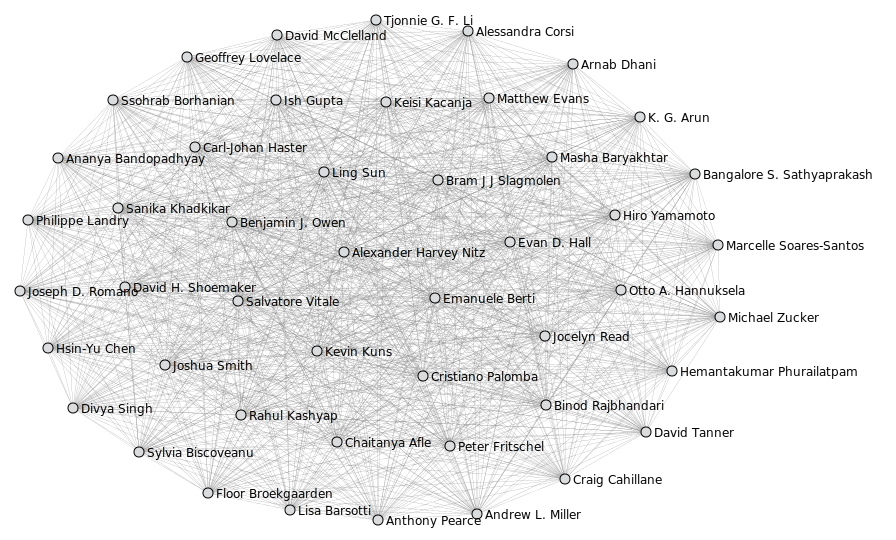

In [7]:
# this is the core of the network science network with labels; the largest cluster in the bipartite projection

draw_graph(nx.k_core(G,40), node_size=5, font_size=12, show_names=True, edge_width=0.1)

# Egocentric Network Analysis

As the above visualization shows, this is a complex network. For knowledge discovery, we should use Egocentric Network Analysis to "zoom in" on nodes of interest. Any node can be looked at, but I am going to programmatically do this, in this notebook, showing only the top twenty nodes, according to page rank.

# PageRank - Identify Nodes of Interest

In [8]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Danielle S. Bassett,0.000609
Mason A. Porter,0.000581
Tao Zhou,0.000422
Loet Leydesdorff,0.000415
Peter J. Mucha,0.000365
Feng Xia,0.000343
Ginestra Bianconi,0.000326
Dmitri Krioukov,0.000296
Walid Saad,0.000286
Matjaz Perc,0.000284


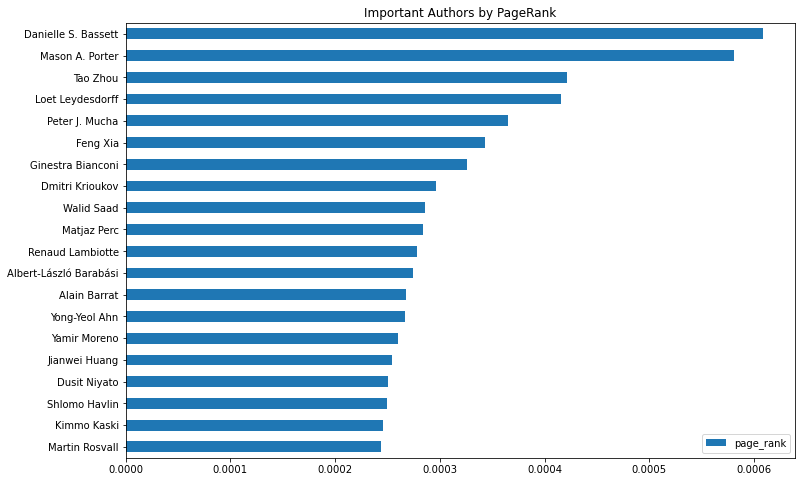

In [9]:
title = 'Important Authors by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

# Egocentric Network Analysis
Next, let's look at the Ego Graphs for each of the top ten characters found by PageRank. Before visualizing and inspecting the Ego Graphs, let's create a Python list so that we can more easily look through them without explicitely typing their names.

In [10]:
top_nodes = pr_df.head(20).index.values

In [11]:
top_nodes[0]

'Danielle S. Bassett'

Now we are all set to start looking through them, in order of importance.

## Top Node Ego Networks
Unlike last time, I am not going to drop the center node or write about findings. This is purely discovery. Remember two things:
- The center node is known as the 'ego' node. It is the node being looked up.
- The other nodes are known as 'alter' nodes. They are connected to the ego node, and sometimes with each other.

Pay close attention to the alter nodes that link to other alter nodes. These are interesting relationships, and you can see subcommunities in the ego network. Think about what you are seeing. What does this tell you?

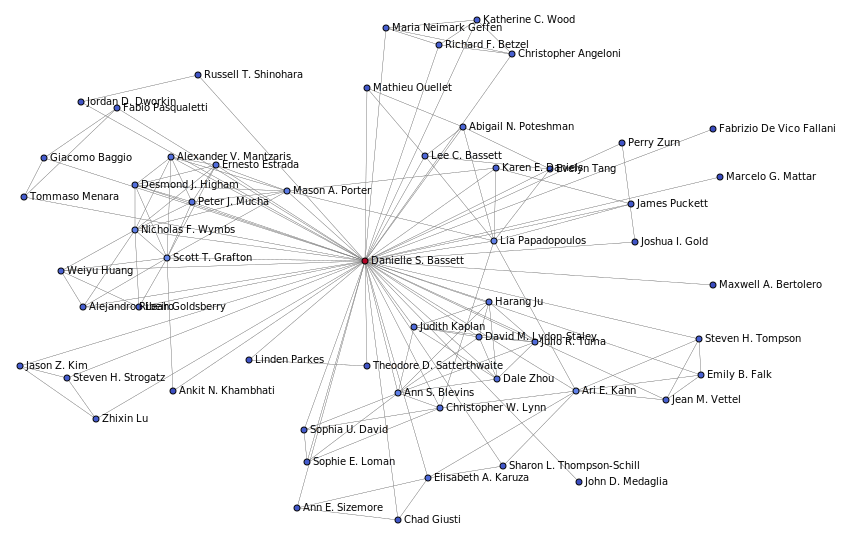

In [37]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

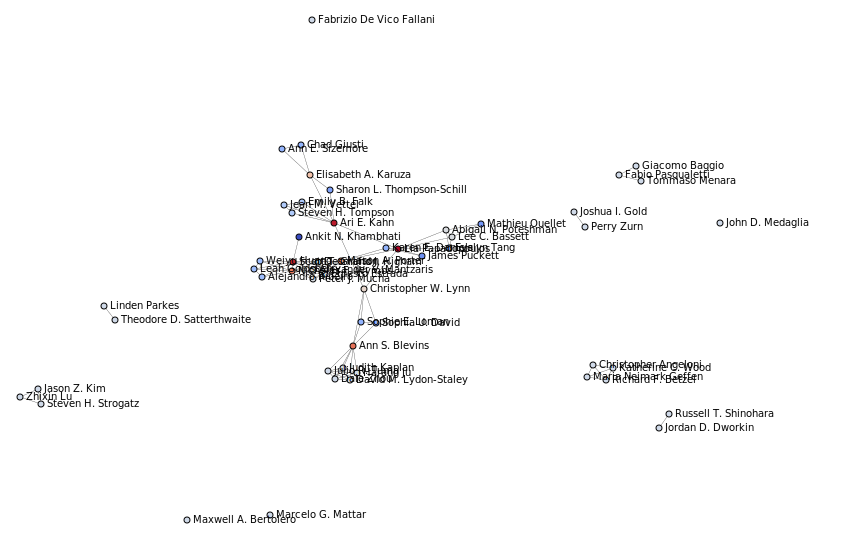

In [38]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [13]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['Brain Network Architecture: Implications for Human Learning',
 'Conformational Control of Mechanical Networks',
 'Dynamic Network Centrality Summarizes Learning in the Human Brain',
 'Emerging Frontiers of Neuroengineering: A Network Science of Brain Connectivity',
 'Evolution of network architecture in a granular material under compression',
 'Functional Control of Oscillator Networks',
 'Functional brain network architecture supporting the learning of social networks in humans',
 'Generative Models for Network Neuroscience: Prospects and Promise',
 'Graph Frequency Analysis of Brain Signals',
 'How We Learn About our Networked World',
 'Human information processing in complex networks',
 'Knowledge gaps in the early growth of semantic networks',
 'Network Analyses and Nervous System Disorders',
 'Network Analysis of Particles and Grains',
 'Network architecture of energy landscapes in mesoscopic quantum systems',
 'Network models in neuroscience',
 'Network neuroscience for optimiz

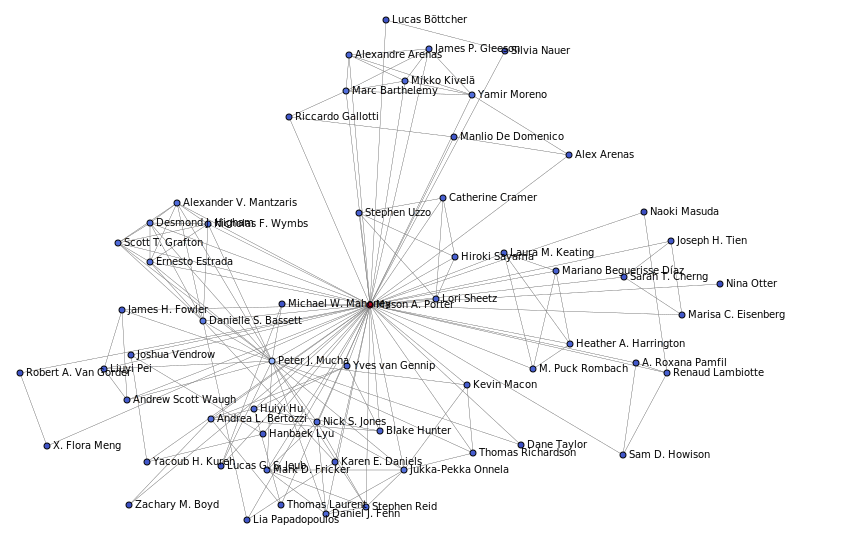

In [14]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [15]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['A Local Perspective on Community Structure in Multilayer Networks',
 'A Method Based on Total Variation for Network Modularity Optimization using the MBO Scheme',
 'A unified framework for equivalences in social networks',
 'Community Structure in Time-Dependent, Multiscale, and Multiplex Networks',
 'Complex networks with complex weights',
 'Dynamic Network Centrality Summarizes Learning in the Human Brain',
 'Information measures and cognitive limits in multilayer navigation',
 'Learning low-rank latent mesoscale structures in networks',
 'Multilayer Networks',
 'Multislice Modularity Optimization in Community Detection and Image Segmentation',
 'MuxViz: A Tool for Multilayer Analysis and Visualization of Networks',
 'Network Analysis of Particles and Grains',
 "Online reactions to the 2017 'Unite the Right' rally in Charlottesville: Measuring polarization in Twitter networks using media followership",
 'Opinion formation and distribution in a bounded confidence model on various ne

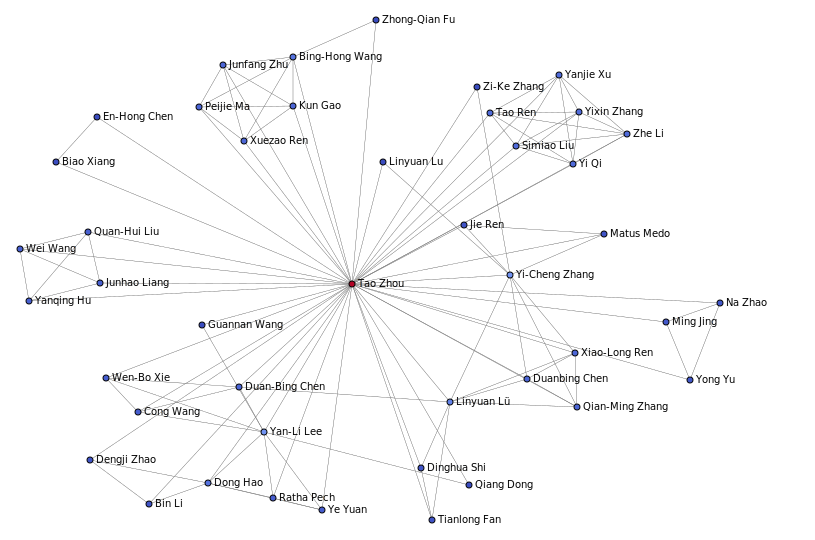

In [16]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [17]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['Characterizing cycle structure in complex networks',
 'Coevolution spreading in complex networks',
 'Collaborative Filtering Approach to Link Prediction',
 'Detecting network communities via greedy expanding based on local superiority index',
 'Epidemic dynamics on complex networks',
 'Experimental analyses on 2-hop-based and 3-hop-based link prediction algorithms',
 'Finding Community Structure Based on Subgraph Similarity',
 'Hierarchical Clustering Supported by Reciprocal Nearest Neighbors',
 'How to project a bipartite network?',
 'Identifying vital nodes based on reverse greedy method',
 'Link Prediction in Complex Networks: A Survey',
 'Link Prediction via controlling the leading eigenvector',
 'Link prediction via linear optimization',
 'Lowest Degree Decomposition of Complex Networks',
 'Mechanism Design in Social Networks',
 'Predicting Missing Links via Local Information',
 'Progresses and Challenges in Link Prediction',
 'Small world yields the most effective information s

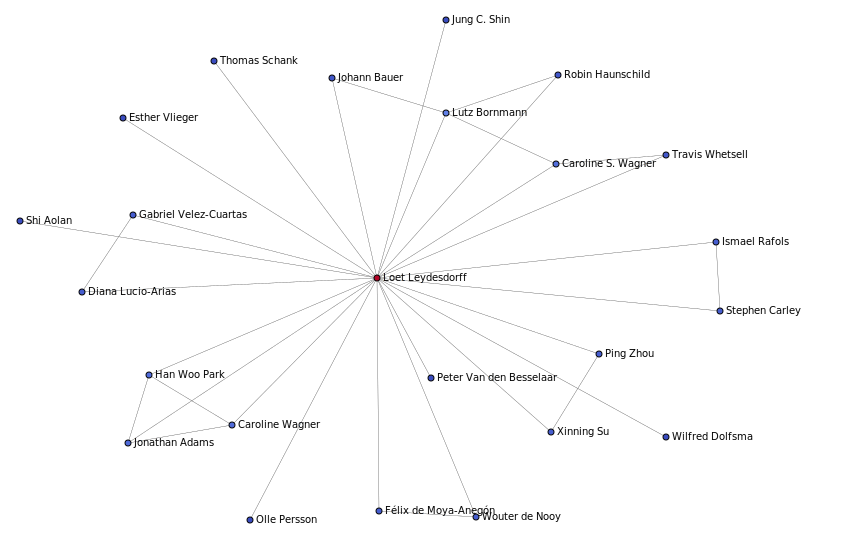

In [18]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [19]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['"Betweenness Centrality" as an Indicator of the "Interdisciplinarity" of Scientific Journals',
 '"Structuration" by Intellectual Organization: The Configuration of Knowledge in Relations among Structural Components in Networks of Science',
 'A comparative study on communication structures of Chinese journals in the social sciences',
 'Aggregated journal-journal citation relations in Scopus and Web-of-Science matched and compared in terms of networks, maps, and interactive overlays',
 'Bibliometrics/Citation networks',
 'Clusters and Maps of Science Journals Based on Bi-connected Graphs in the Journal Citation Reports',
 'Discontinuities in Citation Relations among Journals: Self-organized Criticality as a Model of Scientific Revolutions and Change',
 'Dynamic Animations of Journal Maps: Indicators of Structural Changes and Interdisciplinary Developments',
 'Environment and Planning B as a Journal: The interdisciplinarity of its environment and the citation impact',
 'Global Maps of S

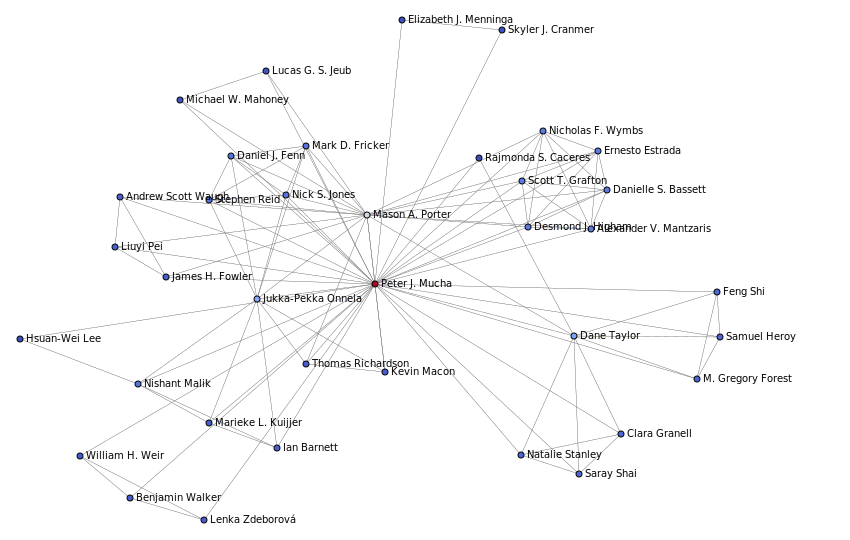

In [20]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [21]:
# you can look at what articles the author was part of this way, going from networks to NLP

sorted(df[df['authors']==ego]['title'])

['A Local Perspective on Community Structure in Multilayer Networks',
 'Case studies in network community detection',
 'Community Structure in Time-Dependent, Multiscale, and Multiplex Networks',
 'Dynamic Network Centrality Summarizes Learning in the Human Brain',
 "Evolutionary prisoner's dilemma games coevolving on adaptive networks",
 'Feature-Based Classification of Networks',
 'Kantian fractionalization predicts the conflict propensity of the international system',
 'Multilayer Modularity Belief Propagation To Assess Detectability Of Community Structure',
 'Party Polarization in Congress: A Network Science Approach',
 'Rigid Graph Compression: Motif-based rigidity analysis for disordered fiber networks',
 'Super-resolution community detection for layer-aggregated multilayer networks',
 'Taxonomies of Networks',
 'Tunable Eigenvector-Based Centralities for Multiplex and Temporal Networks']

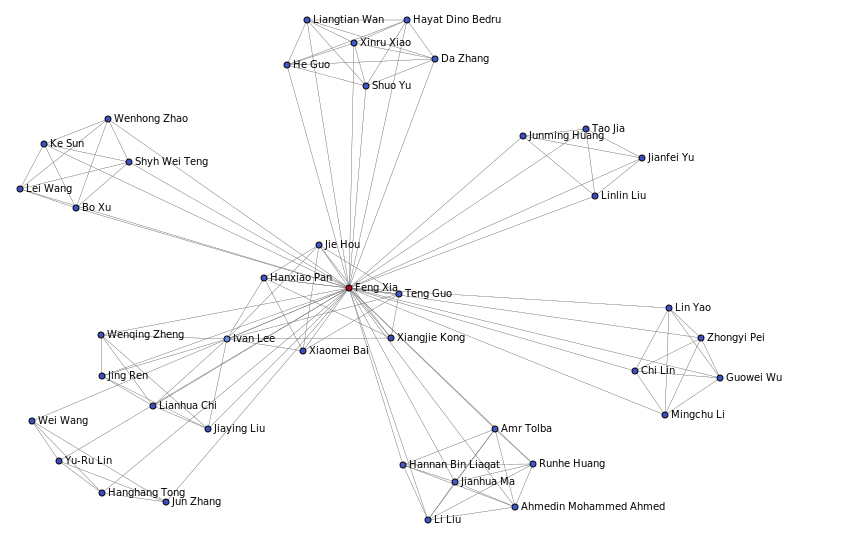

In [22]:
ego = top_nodes[5]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

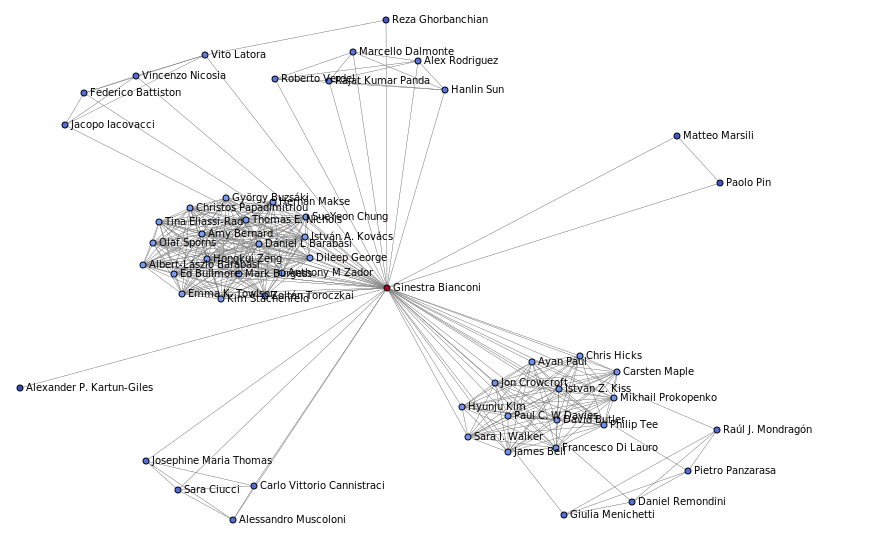

In [23]:
ego = top_nodes[6]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

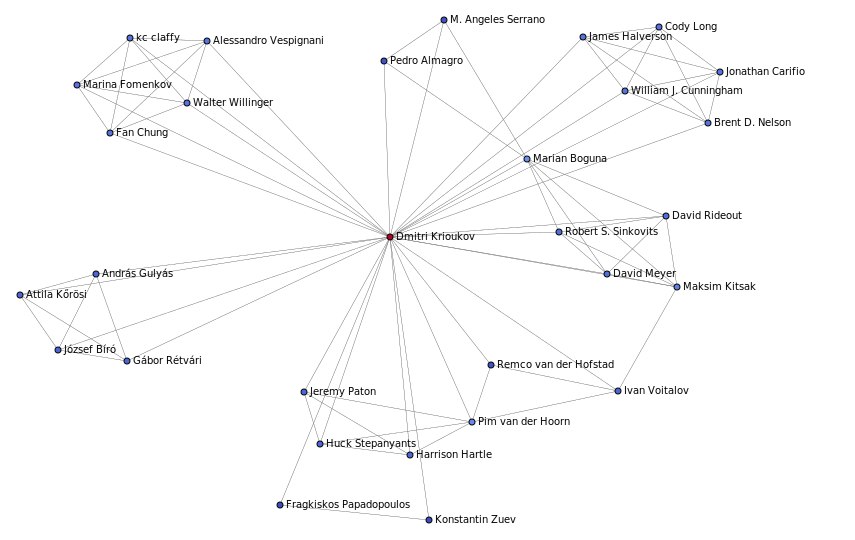

In [24]:
ego = top_nodes[7]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

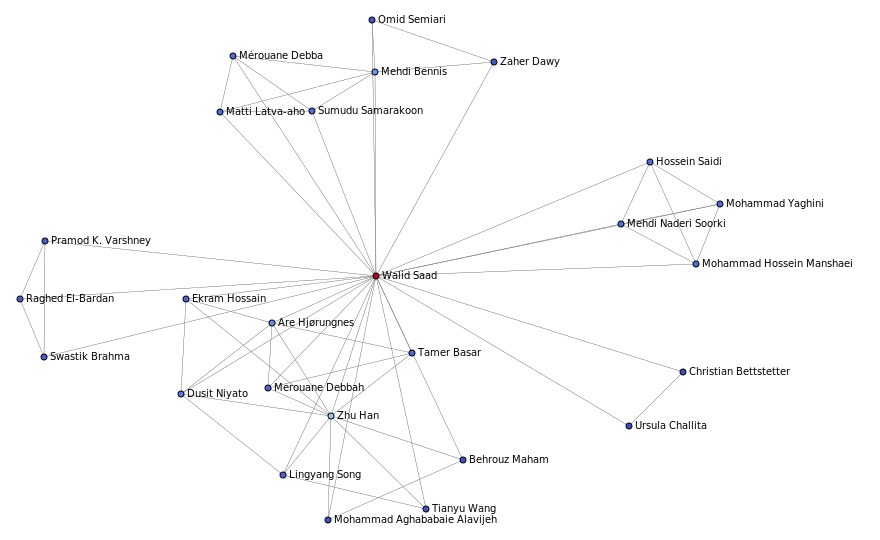

In [25]:
ego = top_nodes[8]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

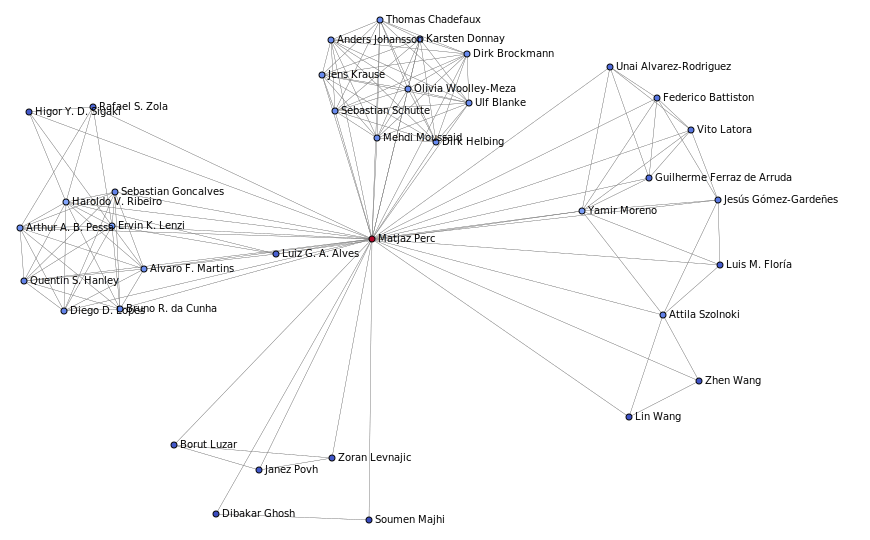

In [26]:
ego = top_nodes[9]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

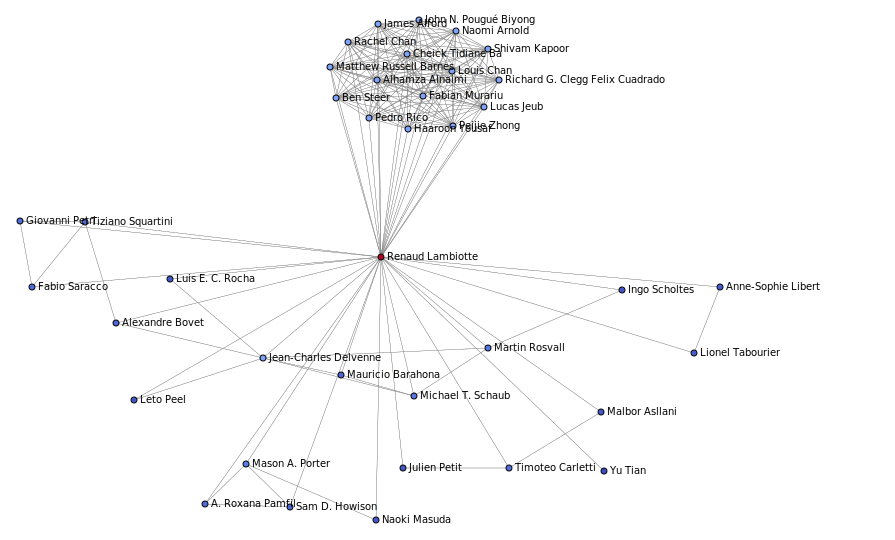

In [27]:
ego = top_nodes[10]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

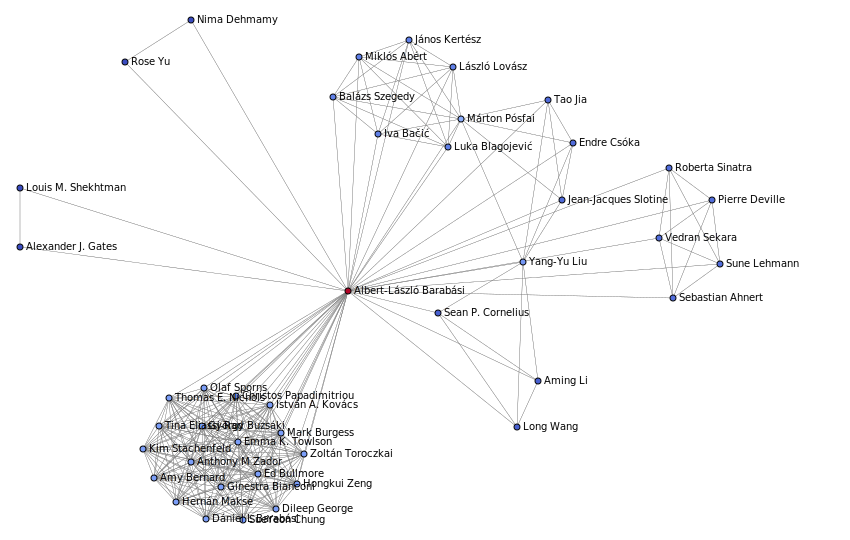

In [28]:
ego = top_nodes[11]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

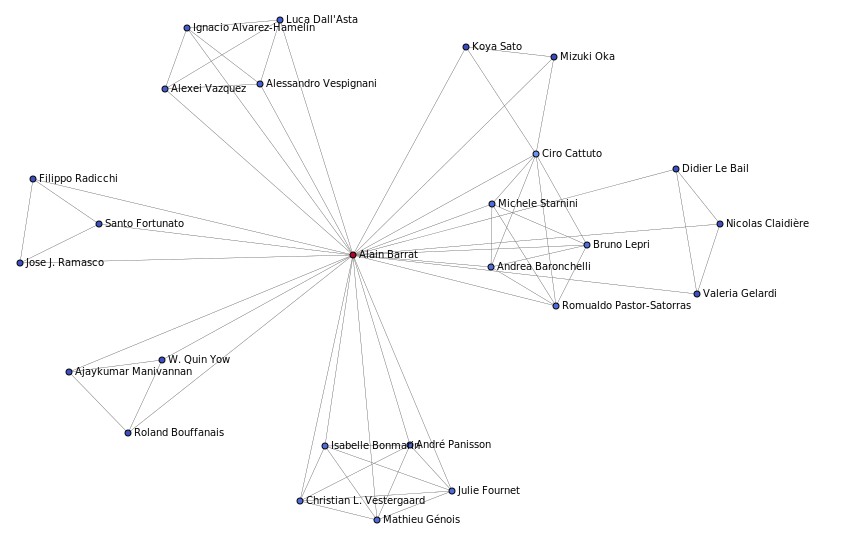

In [29]:
ego = top_nodes[12]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

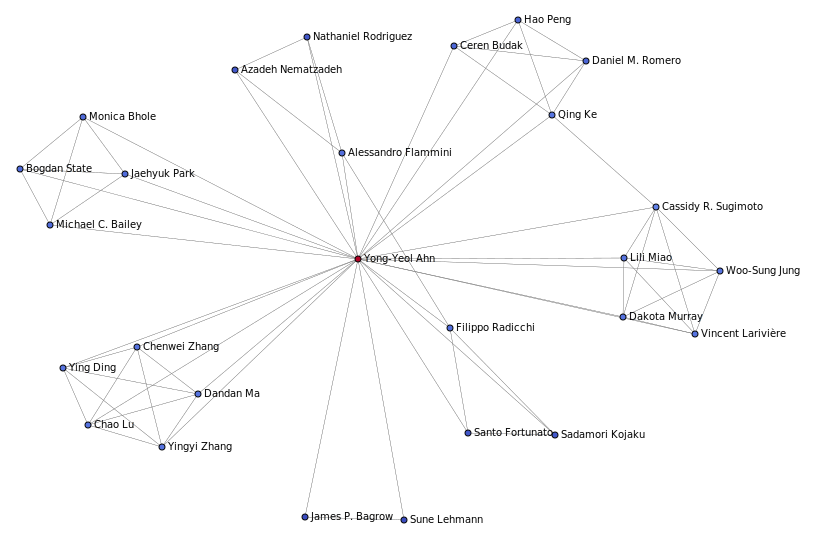

In [30]:
ego = top_nodes[13]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

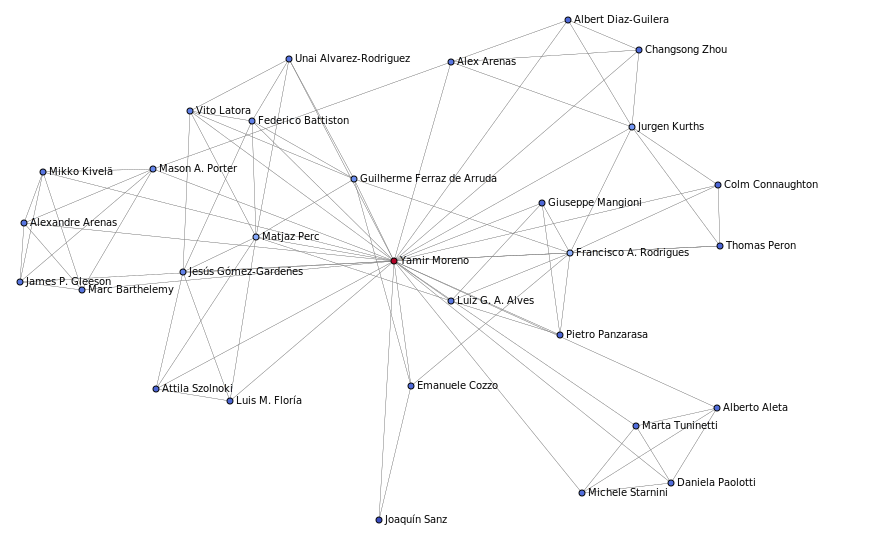

In [31]:
ego = top_nodes[14]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

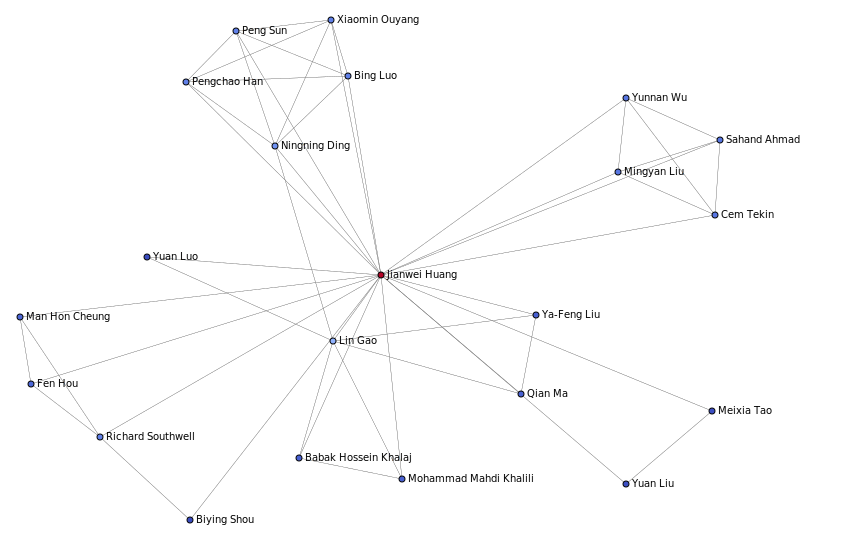

In [32]:
ego = top_nodes[15]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

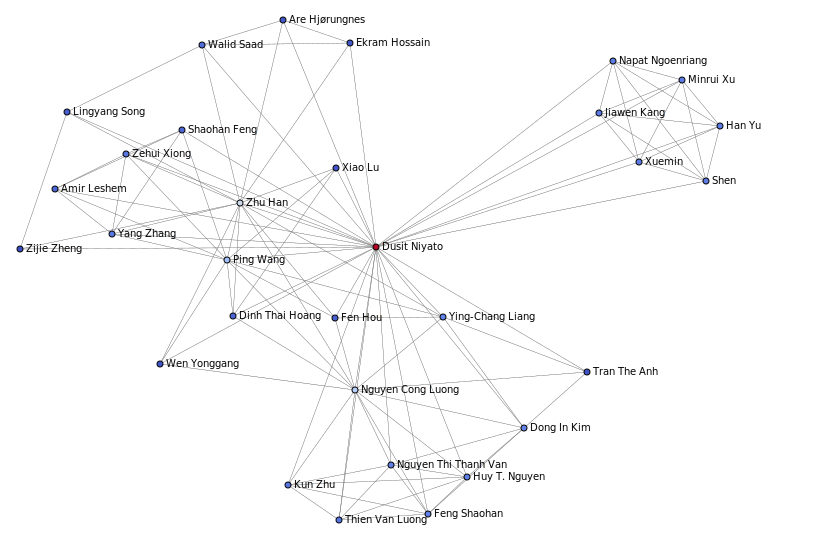

In [33]:
ego = top_nodes[16]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

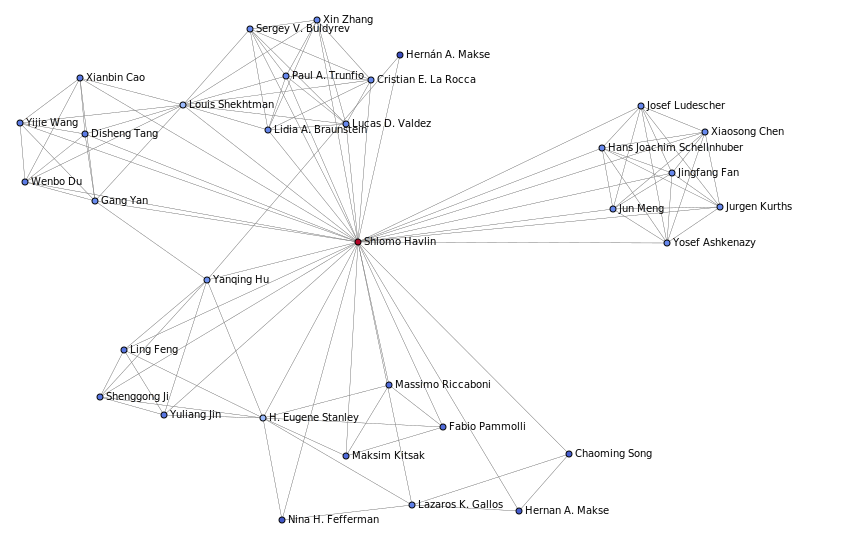

In [34]:
ego = top_nodes[17]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

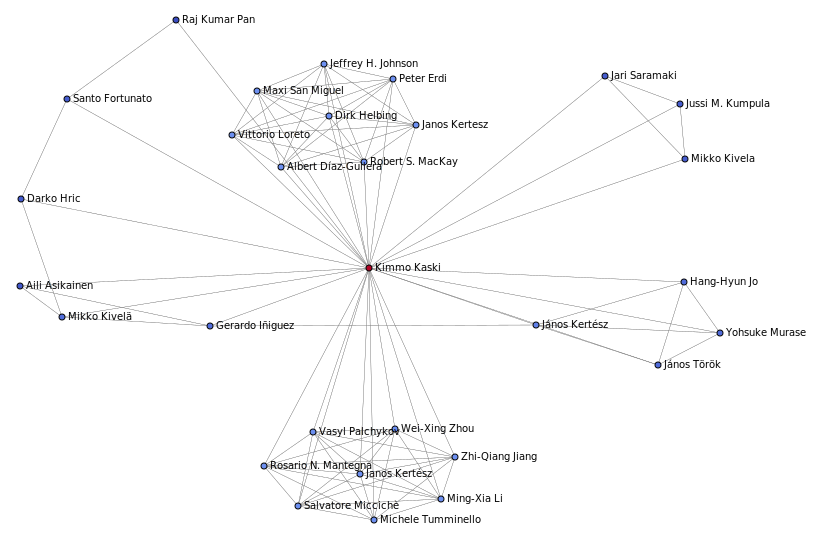

In [35]:
ego = top_nodes[18]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

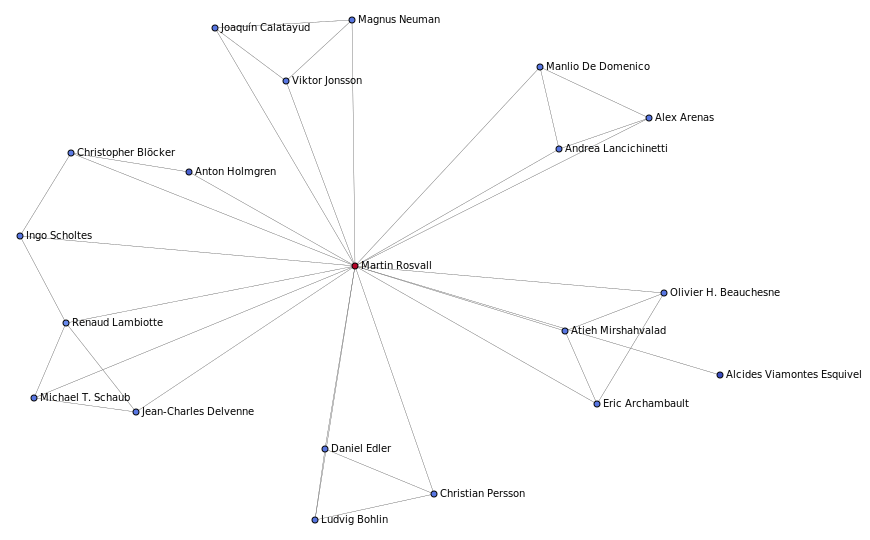

In [36]:
ego = top_nodes[19]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

# This is the Beginning

This is just the beginning of this network exploration. There are communities and connected components that should be explored. There are articles to read and authors to learn about and follow. We will certainly do more with these networks.